![PyData_logo](./static/pydata-logo-madrid-2016.png)

# Remove Before Flight
## Analyzing Flight Safety Data with Python

###### Jesús Martos Carrizo
###### Alejandro Sáez Mollejo

### Introduction

#### Some figures 

![passengers](./static/passenger.jpg)
###### by Ryan McGuire

####  Flight Safety

#### Objective of this talk 

##### Disclaimer

#### Some remarks about

![pandas-logo](./static/pandas_logo.png)

#### Data source

<img src="./static/ntsb.jpg" style="width: 150px;"/>

__National Transportation Safety Board__ is charged with determining the probable cause of transportation accidents and promoting transportation safety, and assisting victims of transportation accidents and their families.

Data: http://www.ntsb.gov/_layouts/ntsb.aviation/index.aspx

### Loading & Cleaning data 

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# Some configuration options:
pd.set_option('max_columns', 70)
pd.set_option('max_rows', 50)

plt.style.use('ggplot')

##### A first glipse of the data: events

[Data base structure](./data/admsrel.pdf)

In [3]:
events = pd.read_csv("./data/events.csv", sep='|', low_memory=False)
events.head()

,ev_id,ntsb_no,ev_type,ev_date,ev_dow,ev_time,ev_tmzn,ev_city,ev_state,ev_country,ev_site_zipcode,ev_year,ev_month,mid_air,on_ground_collision,latitude,longitude,latlong_acq,apt_name,ev_nr_apt_id,ev_nr_apt_loc,apt_dist,apt_dir,apt_elev,wx_brief_comp,wx_src_iic,wx_obs_time,wx_obs_dir,wx_obs_fac_id,wx_obs_elev,wx_obs_dist,wx_obs_tmzn,light_cond,sky_cond_nonceil,sky_nonceil_ht,...,sky_cond_ceil,vis_rvr,vis_rvv,vis_sm,wx_temp,wx_dew_pt,wind_dir_deg,wind_dir_ind,wind_vel_kts,wind_vel_ind,gust_ind,gust_kts,altimeter,wx_dens_alt,wx_int_precip,metar,ev_highest_injury,inj_f_grnd,inj_m_grnd,inj_s_grnd,inj_tot_f,inj_tot_m,inj_tot_n,inj_tot_s,inj_tot_t,invest_agy,ntsb_docket,ntsb_notf_from,ntsb_notf_date,ntsb_notf_tm,fiche_number,lchg_date,lchg_userid,wx_cond_basic,faa_dist_office
0,20001208X07734,LAX97FA143,ACC,04/02/1997 12:00:00 AM,WE,2016.0,MST,GRAND CANYON,AZ,USA,86023,1997.0,4,N,N,,,NaN,,,OFAP,NaN,NaN,NaN,PARP,WFAC,1954.0,180.0,GCN,6606.0,21.0,MST,NDRK,SCAT,3600.0,...,BKN,"0,00000000e+00",0.0,"1,00000000e+01",-2.0,-3.0,0.0,U,0.0,CALM,N,0.0,"2,90000000e+01",NaN,UNK,NaN,FATL,0.0,0.0,0.0,2.0,NaN,NaN,NaN,2.0,N,1890.0,NaN,04/02/1997 12:00:00 AM,1922.0,IMAGE,12/08/2000 12:13:19 PM,dbo,IMC,NaN
1,20021008X05297,CHI02LA299,ACC,09/29/2002 12:00:00 AM,Su,2100.0,CDT,Moorhead,MN,USA,56560,2002.0,9,N,N,465021N,0963947W,NaN,Moorhead Municipal,JKJ,ONAP,NaN,NaN,917.0,UNK,WFAC,2053.0,47.0,FAR,908.0,9.0,BST,NDRK,CLER,NaN,...,OVC,NaN,NaN,"7,00000000e+00",14.0,12.0,160.0,Y,13.0,SPEC,Y,0.0,"2,97099991e+01",NaN,NaN,NaN,SERS,NaN,NaN,NaN,NaN,1.0,NaN,1.0,2.0,N,13246.0,FAA,10/03/2002 12:00:00 AM,945.0,DMS,04/23/2003 12:26:44 PM,NTSB\\MONR,VMC,Minneapolis FSDO
2,20040127X00111,LAX04LA103,ACC,10/12/2003 12:00:00 AM,Su,1640.0,MST,Scottsdale,AZ,USA,85255,2003.0,10,N,N,333722N,1115438W,NaN,Scottsdale,SDL,ONAP,NaN,NaN,1510.0,FULL,WFAC,1653.0,NaN,KSDL,1510.0,NaN,MST,DAYL,CLER,NaN,...,NONE,NaN,NaN,"1,00000000e+01",33.0,12.0,NaN,NaN,NaN,CALM,N,NaN,"2,98899994e+01",NaN,NaN,NaN,NONE,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,N,17586.0,FAA,01/22/2004 12:00:00 AM,1215.0,DMS,04/28/2005 02:59:26 PM,NTSB\\JOHB,VMC,WP-SDL-FSDO
3,20001213X34369,ANC86LA135,ACC,08/23/1986 12:00:00 AM,SA,1100.0,AKD,TALKEETNA,AK,USA,99676,1986.0,8,N,N,,,NaN,,,OFAP,"0,00000000e+00",0.0,0.0,UNK,PILO,0.0,0.0,,0.0,0.0,,DAYL,CLER,0.0,...,NONE,"0,00000000e+00",0.0,"5,00000000e+01",10.0,-18.0,0.0,U,0.0,UNK,U,0.0,NaN,NaN,UNK,NaN,NONE,0.0,0.0,0.0,NaN,NaN,3.0,NaN,NaN,N,891.0,NaN,08/23/1986 12:00:00 AM,1430.0,31238,01/02/2001 09:14:50 AM,dbo,VMC,NaN
4,20001213X35290,ANC87LA019,ACC,12/07/1986 12:00:00 AM,SU,1256.0,AST,SHAGELUK,AK,USA,99665,1986.0,12,N,N,,,NaN,,1,OFAP,"0,00000000e+00",0.0,0.0,UNK,PILO,0.0,0.0,,0.0,0.0,,DAYL,SCAT,1500.0,...,NONE,"0,00000000e+00",0.0,"4,00000000e+01",-1.0,-1.0,0.0,U,0.0,CALM,N,0.0,"2,90000000e+01",NaN,LGT,NaN,NONE,0.0,0.0,0.0,NaN,NaN,1.0,NaN,NaN,N,1400.0,NaN,12/07/1986 12:00:00 AM,1300.0,31791,01/02/2001 09:14:55 AM,dbo,VMC,NaN


In [4]:
events.describe()

,ev_time,ev_year,apt_dir,apt_elev,wx_obs_time,wx_obs_dir,wx_obs_elev,wx_obs_dist,sky_nonceil_ht,sky_ceil_ht,vis_rvv,wx_temp,wx_dew_pt,wind_dir_deg,wind_vel_kts,gust_kts,wx_dens_alt,inj_f_grnd,inj_m_grnd,inj_s_grnd,inj_tot_f,inj_tot_m,inj_tot_n,inj_tot_s,inj_tot_t,ntsb_docket,ntsb_notf_tm
count,76535.000000,76848.000000,37020.000000,48146.000000,69909.000000,63990.000000,67552.000000,65299.000000,56454.000000,55382.000000,48754.000000,67043.000000,55773.000000,67986.000000,69080.000000,53729.000000,20314.000000,49522.000000,49526.000000,49513.000000,15253.000000,14347.000000,46273.000000,10793.000000,35217.000000,72695.000000,56995.000000
mean,1373.671196,1996.920427,49.827769,1055.010344,999.464661,103.528911,866.237728,11.339745,3255.918819,2930.506861,0.146039,19.850603,6.877970,161.884167,7.257426,3.650245,1772.910357,0.010157,0.013064,0.011209,2.813545,1.866732,7.574676,1.543037,2.451969,8586.409781,1043.181577
std,434.386422,101.770110,100.047186,1655.995540,720.507141,122.243560,3746.138486,30.473635,6264.894555,6349.779335,22.881972,17.341558,15.660181,117.043219,5.951389,10.485619,2706.629533,0.353946,0.393807,0.518030,11.025730,5.172820,31.982420,2.722736,8.733082,10805.425263,718.420703
min,0.000000,1948.000000,0.000000,-210.000000,0.000000,0.000000,-115.000000,0.000000,0.000000,0.000000,0.000000,-62.000000,-38.000000,0.000000,0.000000,0.000000,-30536.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,1100.000000,1988.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,45.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,945.000000,1.000000
50%,1400.000000,1996.000000,0.000000,434.000000,1153.000000,40.000000,128.000000,1.000000,0.000000,0.000000,0.000000,21.000000,8.000000,170.000000,7.000000,0.000000,500.000000,0.000000,0.000000,0.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2005.000000,1200.000000
75%,1700.000000,2005.000000,20.000000,1071.000000,1553.000000,200.000000,845.000000,16.000000,4000.000000,2700.000000,0.000000,27.000000,16.000000,260.000000,10.000000,0.000000,2370.750000,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,16468.500000,1600.000000
max,2400.000000,26733.000000,979.000000,13250.000000,2400.000000,360.000000,751635.000000,1526.000000,250000.000000,250000.000000,4444.000000,1652.000000,1646.000000,999.000000,210.000000,999.000000,26858.000000,44.000000,62.000000,71.000000,349.000000,380.000000,699.000000,111.000000,380.000000,34935.000000,2400.000000


In [5]:
events.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76880 entries, 0 to 76879
Data columns (total 71 columns):
ev_id                  76880 non-null object
ntsb_no                76852 non-null object
ev_type                76850 non-null object
ev_date                76849 non-null object
ev_dow                 76846 non-null object
ev_time                76535 non-null float64
ev_tmzn                76315 non-null object
ev_city                76792 non-null object
ev_state               73286 non-null object
ev_country             76356 non-null object
ev_site_zipcode        73857 non-null object
ev_year                76848 non-null float64
ev_month               76848 non-null object
mid_air                76103 non-null object
on_ground_collision    76121 non-null object
latitude               66492 non-null object
longitude              66495 non-null object
latlong_acq            10672 non-null object
apt_name               66518 non-null object
ev_nr_apt_id           66011 non-n

In [6]:
# Cleaning dates
date_format = "%m/%d/%Y %I:%M:%S %p"
date = events['ev_date'].dropna()
date = pd.to_datetime(date, format=date_format)
time = events['ev_time'].astype(str).str.split('.').str[0].str.zfill(4)
time = pd.to_datetime(time, format="%H%M", errors='coerce') # for nan values

time.fillna('0000', inplace=True)

str_date = date.dt.date.astype(str)
str_time = time.dt.time.astype(str)
date_time = pd.to_datetime(str_date + ' ' + str_time,
                           format="%Y-%m-%d %H:%M:%S")
events['ev_date'] = date_time

In [7]:
events.info(memory_usage='deep', max_cols=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76880 entries, 0 to 76879
Columns: 71 entries, ev_id to faa_dist_office
dtypes: datetime64[ns](1), float64(27), object(43)
memory usage: 205.7 MB


In [8]:
events.columns

Index(['ev_id', 'ntsb_no', 'ev_type', 'ev_date', 'ev_dow', 'ev_time',
       'ev_tmzn', 'ev_city', 'ev_state', 'ev_country', 'ev_site_zipcode',
       'ev_year', 'ev_month', 'mid_air', 'on_ground_collision', 'latitude',
       'longitude', 'latlong_acq', 'apt_name', 'ev_nr_apt_id', 'ev_nr_apt_loc',
       'apt_dist', 'apt_dir', 'apt_elev', 'wx_brief_comp', 'wx_src_iic',
       'wx_obs_time', 'wx_obs_dir', 'wx_obs_fac_id', 'wx_obs_elev',
       'wx_obs_dist', 'wx_obs_tmzn', 'light_cond', 'sky_cond_nonceil',
       'sky_nonceil_ht', 'sky_ceil_ht', 'sky_cond_ceil', 'vis_rvr', 'vis_rvv',
       'vis_sm', 'wx_temp', 'wx_dew_pt', 'wind_dir_deg', 'wind_dir_ind',
       'wind_vel_kts', 'wind_vel_ind', 'gust_ind', 'gust_kts', 'altimeter',
       'wx_dens_alt', 'wx_int_precip', 'metar', 'ev_highest_injury',
       'inj_f_grnd', 'inj_m_grnd', 'inj_s_grnd', 'inj_tot_f', 'inj_tot_m',
       'inj_tot_n', 'inj_tot_s', 'inj_tot_t', 'invest_agy', 'ntsb_docket',
       'ntsb_notf_from', 'ntsb_notf_date'

In [9]:
events.drop(['ev_dow', 'ev_time', 'ev_tmzn', 'ev_year', 'ev_month'], axis=1, inplace=True)

In [10]:
events.memory_usage(deep=True).sum() / 1024

195691.740234375

##### Discarding incidents 

In [11]:
gby_ev_type = events.groupby('ev_type')
gby_ev_type.groups.keys()

dict_keys(['INC', 'ACC'])

In [12]:
events = gby_ev_type.get_group('ACC')

##### Focus on commercial flights 

In [13]:
aircraft = pd.read_csv("./data/aircraft.csv",
                                    encoding = "ISO-8859-1",  # export the table again.
                                    sep=';',
                                    low_memory=False)

In [14]:
aircraft.head(1)

,ev_id,Aircraft_Key,regis_no,ntsb_no,acft_missing,far_part,flt_plan_filed,flight_plan_activated,damage,acft_fire,acft_expl,acft_make,acft_model,acft_series,acft_serial_no,cert_max_gr_wt,acft_category,acft_reg_cls,homebuilt,fc_seats,cc_seats,pax_seats,total_seats,num_eng,fixed_retractable,type_last_insp,date_last_insp,afm_hrs_last_insp,afm_hrs,elt_install,elt_oper,elt_aided_loc_ev,elt_type,owner_acft,owner_street,...,second_pilot,dprt_pt_same_ev,dprt_apt_id,dprt_city,dprt_state,dprt_country,dprt_time,dprt_timezn,dest_same_local,dest_apt_id,dest_city,dest_state,dest_country,phase_flt_spec,report_to_icao,evacuation,lchg_date,lchg_userid,afm_hrs_since,rwy_num,rwy_len,rwy_width,site_seeing,air_medical,med_type_flight,acft_year,fuel_on_board,commercial_space_flight,unmanned,ifr_equipped_cert,elt_mounted_aircraft,elt_connected_antenna,elt_manufacturer,elt_model,elt_reason_other
0,20001204X00000,1,N6312H,ANC99FA021,N,135,CVFR,NaN,SUBS,NONE,NONE,Cessna,207,207,20700478,3800.0,AIR,USUS,N,NaN,NaN,NaN,2.0,1.0,NaN,100H,16/12/1998,75,10286,Y,Y,U,NaN,"VILLAGE AVIATION, INC.",P.O.BOX 221188,...,N,N,BET,BETHEL,AK,NaN,1245.0,AST,SAME,NaN,NaN,NaN,NaN,560.0,NaN,NaN,02/01/2001,dbo,NaN,0,NaN,NaN,N,N,NaN,NaN,NaN,FALSO,FALSO,FALSO,FALSO,FALSO,NaN,NaN,NaN


In [15]:
gby_far_part = aircraft.groupby('far_part')
gby_far_part.groups.keys()

dict_keys(['137', 'NUSC', '121', 'NUSN', '103', '129', 'PUBU', '091K', 'ARMF', '437', '091', '133', '125', '135', 'UNK', '091F'])

In [16]:
desired_far_parts = ['NUSC',  # Non-U.S. Commercial
                     '121',      # Air Carrier
                     '129',      # Foreign
                   # '091',      # General Aviation
                     'NUSN',  # Non-U.S. Non-Commercial
                     'UNK',     # Unknown
                     '135']

In [17]:
cond = aircraft['far_part'].isin(desired_far_parts)
ev_ids_for_desired_far = aircraft[cond]['ev_id'].drop_duplicates()
ev_ids_for_desired_far.head()

0     20001204X00000
1     20001204X00001
2     20001204X00002
4     20001204X00004
20    20001204X00020
Name: ev_id, dtype: object

In [18]:
ev_ids_for_desired_far.count()

8513

In [19]:
ev_ids_for_desired_far.values

array(['20001204X00000', '20001204X00001', '20001204X00002', ...,
       '20160210X70158', '20160212X11826', '20160222X93713'], dtype=object)

In [20]:
aircraft = aircraft.loc[ev_ids_for_desired_far.index]
aircraft.head()

,ev_id,Aircraft_Key,regis_no,ntsb_no,acft_missing,far_part,flt_plan_filed,flight_plan_activated,damage,acft_fire,acft_expl,acft_make,acft_model,acft_series,acft_serial_no,cert_max_gr_wt,acft_category,acft_reg_cls,homebuilt,fc_seats,cc_seats,pax_seats,total_seats,num_eng,fixed_retractable,type_last_insp,date_last_insp,afm_hrs_last_insp,afm_hrs,elt_install,elt_oper,elt_aided_loc_ev,elt_type,owner_acft,owner_street,...,second_pilot,dprt_pt_same_ev,dprt_apt_id,dprt_city,dprt_state,dprt_country,dprt_time,dprt_timezn,dest_same_local,dest_apt_id,dest_city,dest_state,dest_country,phase_flt_spec,report_to_icao,evacuation,lchg_date,lchg_userid,afm_hrs_since,rwy_num,rwy_len,rwy_width,site_seeing,air_medical,med_type_flight,acft_year,fuel_on_board,commercial_space_flight,unmanned,ifr_equipped_cert,elt_mounted_aircraft,elt_connected_antenna,elt_manufacturer,elt_model,elt_reason_other
0,20001204X00000,1,N6312H,ANC99FA021,N,135,CVFR,NaN,SUBS,NONE,NONE,Cessna,207,207,20700478,3800.0,AIR,USUS,N,NaN,NaN,NaN,2.0,1.0,NaN,100H,16/12/1998,75,10286,Y,Y,U,NaN,"VILLAGE AVIATION, INC.",P.O.BOX 221188,...,N,N,BET,BETHEL,AK,NaN,1245.0,AST,SAME,NaN,NaN,NaN,NaN,560.0,NaN,NaN,02/01/2001,dbo,NaN,0,NaN,NaN,N,N,NaN,NaN,NaN,FALSO,FALSO,FALSO,FALSO,FALSO,NaN,NaN,NaN
1,20001204X00001,1,N481EV,ANC99IA025,N,121,IFR,NaN,MINR,GRD,NONE,Boeing,747-100,747-100,19896,750000.0,AIR,USUS,N,NaN,NaN,NaN,9.0,4.0,RETR,COAW,06/01/1999,113,26359,Y,U,U,NaN,"FIRST SECURITY BANK, NA",79 S. MAIN STREET,...,Y,N,RJCC,CHITOSE,JA,NaN,2159.0,AST,SAME,FAI,NaN,NaN,NaN,570.0,NaN,NaN,02/01/2001,dbo,NaN,1L,11800.0,150.0,N,N,NaN,NaN,NaN,FALSO,FALSO,FALSO,FALSO,FALSO,NaN,NaN,NaN
2,20001204X00002,1,N6GR,ANC99LA020,N,135,CVFR,NaN,SUBS,NONE,NONE,Piper,PA-31-350,PA-31-350,31-7752130,7369.0,AIR,USUS,N,NaN,NaN,NaN,6.0,2.0,RETR,AAIP,21/12/1998,32,5290,Y,N,U,NaN,JIM AIR INC.,4200 FLOATPLANE DR.,...,N,N,C05,CHENEGA BAY,AK,NaN,1340.0,AST,SAME,ANC,NaN,NaN,NaN,0.0,NaN,NaN,27/04/2001,dbo,NaN,0,NaN,NaN,N,N,NaN,NaN,NaN,FALSO,FALSO,FALSO,FALSO,FALSO,NaN,NaN,NaN
4,20001204X00004,1,N19TA,ANC99LA023,N,135,CVFR,NaN,SUBS,NONE,NONE,Cessna,207,207,20700468,3800.0,AIR,USUS,N,NaN,NaN,NaN,6.0,1.0,NaN,AAIP,14/12/1998,49,14424,Y,Y,N,NaN,ARCTIC TRANSPORTATION SERVICES,"5701 SILVERADO WAY, SUITE L",...,N,Y,VAK,NaN,AK,NaN,947.0,AST,LOCL,NaN,NaN,NaN,NaN,550.0,NaN,NaN,02/01/2001,dbo,NaN,14,2610.0,40.0,N,N,NaN,NaN,NaN,FALSO,FALSO,FALSO,FALSO,FALSO,NaN,NaN,NaN
20,20001204X00020,1,N50BA,CHI99LA059,N,135,IFR,NaN,SUBS,NONE,NONE,Rockwell,500-S,500-S,1860-39,6750.0,AIR,USUS,N,NaN,NaN,NaN,7.0,2.0,RETR,ANNL,09/10/1998,87,12392,Y,N,U,NaN,"BYERLY AVIATION, INC.",GREATER PEORIA AIRPORT,...,N,N,PIA,PEORIA,IL,NaN,1100.0,CST,SAME,C65,NaN,NaN,NaN,0.0,NaN,NaN,27/04/2001,dbo,NaN,10,4400.0,60.0,N,N,NaN,NaN,NaN,FALSO,FALSO,FALSO,FALSO,FALSO,NaN,NaN,NaN


In [21]:
mask = events['ev_id'].isin(ev_ids_for_desired_far.values)
events = events[mask]
events.head()

,ev_id,ntsb_no,ev_type,ev_date,ev_city,ev_state,ev_country,ev_site_zipcode,mid_air,on_ground_collision,latitude,longitude,latlong_acq,apt_name,ev_nr_apt_id,ev_nr_apt_loc,apt_dist,apt_dir,apt_elev,wx_brief_comp,wx_src_iic,wx_obs_time,wx_obs_dir,wx_obs_fac_id,wx_obs_elev,wx_obs_dist,wx_obs_tmzn,light_cond,sky_cond_nonceil,sky_nonceil_ht,sky_ceil_ht,sky_cond_ceil,vis_rvr,vis_rvv,vis_sm,wx_temp,wx_dew_pt,wind_dir_deg,wind_dir_ind,wind_vel_kts,wind_vel_ind,gust_ind,gust_kts,altimeter,wx_dens_alt,wx_int_precip,metar,ev_highest_injury,inj_f_grnd,inj_m_grnd,inj_s_grnd,inj_tot_f,inj_tot_m,inj_tot_n,inj_tot_s,inj_tot_t,invest_agy,ntsb_docket,ntsb_notf_from,ntsb_notf_date,ntsb_notf_tm,fiche_number,lchg_date,lchg_userid,wx_cond_basic,faa_dist_office
40,20140507X51410,DCA14CA090,ACC,2014-03-04 23:00:00,San Diego,CA,USA,92101,N,N,324406N,1171123W,NaN,San Diego International,SAN,ONAP,"0,00000000e+00",NaN,17.0,NaN,UNK,651.0,NaN,SAN,NaN,NaN,UTC,DAYL,FEW,NaN,NaN,NONE,NaN,NaN,"1,00000000e+01",15.0,11.0,20.0,Y,3.0,SPEC,N,NaN,"3,00799999e+01",NaN,NaN,NaN,SERS,NaN,NaN,NaN,NaN,NaN,186.0,1.0,1.0,N,NaN,Delta Air Lines Flight Safety,NaN,NaN,NaN,09/10/2015 04:49:58 PM,lovj,VMC,NaN
46,20001213X30836,ANC87FA067,ACC,1987-05-07 14:15:00,NIGHTMUTE,AK,USA,99690,N,N,,,NaN,,,OFAP,"0,00000000e+00",0.0,NaN,UNK,WIT,0.0,0.0,,0.0,0.0,,DAYL,CLER,0.0,500.0,OBSC,"0,00000000e+00",0.0,"1,00000000e+00",-1.0,-2.0,140.0,U,6.0,UNK,N,0.0,"2,90000000e+01",NaN,LGT,NaN,FATL,0.0,0.0,0.0,1.0,NaN,NaN,NaN,1.0,N,217.0,NaN,05/09/1987 12:00:00 AM,2200.0,33175,12/13/2000 02:22:27 PM,dbo,IMC,NaN
50,20001213X26058,NYC88LA152,ACC,1988-06-01 08:50:00,UTICA,NY,USA,13502,N,N,,,NaN,,,OFAP,"0,00000000e+00",0.0,NaN,UNK,PILO,0.0,0.0,,0.0,0.0,,DAYL,UNK,0.0,3800.0,OVC,"0,00000000e+00",0.0,"3,00000000e+00",21.0,NaN,290.0,U,5.0,UNK,U,0.0,NaN,NaN,LGT,NaN,NONE,0.0,0.0,0.0,NaN,NaN,1.0,NaN,NaN,N,1955.0,NaN,06/01/1988 12:00:00 AM,1115.0,38223,12/13/2000 11:51:24 AM,dbo,VMC,NaN
56,20050825X01307,DCA05RA088,ACC,2005-08-02 16:00:00,Toronto,NaN,CA,NaN,N,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NONE,NaN,NaN,NaN,NaN,NaN,309.0,NaN,NaN,O,NaN,TSB,NaN,NaN,NaN,11/04/2005 02:15:07 PM,NTSB\\JOHB,NaN,NaN
63,20151123X43041,ERA16WA047,ACC,2015-11-17 15:50:00,Choco,FN,CO,NaN,N,N,083020N,0771624W,EST,Acandi,SKAD,OFAP,NaN,NaN,50.0,NaN,UNK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FATL,NaN,NaN,NaN,2.0,NaN,NaN,8.0,10.0,O,NaN,Government of Colombia,NaN,NaN,NaN,11/30/2015 12:04:29 PM,kenj,VMC,NaN


### Data Analysis 

From now on, `events` and `aircraft` only contain **accident** data from flights corresponding to **FAR parts** in desired_far_parts.

#### Where do accidents occur?

##### What information do we have about location? 

In [22]:
events[['ev_city', 'ev_state', 'ev_country', 'latitude', 'longitude']].head(10)

,ev_city,ev_state,ev_country,latitude,longitude
40,San Diego,CA,USA,324406N,1171123W
46,NIGHTMUTE,AK,USA,,
50,UTICA,NY,USA,,
56,Toronto,NaN,CA,NaN,NaN
63,Choco,FN,CO,083020N,0771624W
92,Sydney,NaN,AS,NaN,NaN
111,Wailuku,HI,USA,205355N,1562550W
116,GRAND JUNCTION,CO,USA,,
120,JUNEAU,AK,USA,,
129,YUBA CITY,CA,USA,,


##### So, let's parse it!

In [23]:
def convert_lat(string):
    degs = float(string[0:2])
    mins = float(string[2:4])
    secs = float(string[4:6])
    last = string[6].lower()
    if last == 's':
        factor = -1.0
    elif last == 'n':
        factor = 1.0
    else:
        raise ValueError("invalid hemisphere")
    return factor * (degs + mins / 60 + secs / 3600)

def convert_lon(string):
    degs = float(string[0:3])
    mins = float(string[3:5])
    secs = float(string[5:7])
    last = string[7].lower()
    if last == 'w':
        factor = -1.0
    elif last == 'e':
        factor = 1.0
    else:
        raise ValueError("invalid direction")
    return factor * (degs + mins / 60 + secs / 3600)

In [24]:
# Parsing latitude
events['latitude'] = events['latitude'].replace('       ', np.nan)
lat = events['latitude']
lat.dropna(inplace=True)

mask = lat.str.contains(r'^[0-9]{6}[NnSs]$')
events['latitude_num'] = lat[mask].apply(convert_lat)

# Parsing longitude
events['longitude'] = events['longitude'].replace('        ', np.nan)
lon = events['longitude']
lon.dropna(inplace=True)

mask = lon.str.contains(r'^[0-9]{7}[EeWw]$')
events['longitude_num'] = lon[mask].apply(convert_lon)

events[['longitude_num', 'latitude_num']].head()

,longitude_num,latitude_num
40,-117.189722,32.735000
46,NaN,NaN
50,NaN,NaN
56,NaN,NaN
63,-77.273333,8.505556


##### Using Google Geocode API

Due to the limitation on the daily number of requests we will load data that have requested previously.

In [25]:
cond = events['longitude'].isnull() | events['latitude'].isnull()

events['ev_id'][cond].count()

4307

In [26]:
need_location = events.loc[cond][['ev_city', 'ev_country', 'ev_state', 'latitude', 'longitude']]
need_location.head()

,ev_city,ev_country,ev_state,latitude,longitude
46,NIGHTMUTE,USA,AK,NaN,NaN
50,UTICA,USA,NY,NaN,NaN
56,Toronto,CA,NaN,NaN,NaN
92,Sydney,AS,NaN,NaN,NaN
116,GRAND JUNCTION,USA,CO,NaN,NaN


We use `need_location.csv` and generate ---> `have_location_part1.csv` & `have_location_part_2.csv`

In [27]:
have_location1 = pd.read_csv('./data/have_location_part1.csv', index_col='Unnamed: 0')

events.loc[have_location1.index, ['latitude_num']] = have_location1['latitude']
events.loc[have_location1.index, ['longitude_num']] = have_location1['longitude']
events.loc[have_location1.index, ['ev_city', 'ev_country', 'ev_state', 'latitude', 'longitude']]

,ev_city,ev_country,ev_state,latitude,longitude
46,NIGHTMUTE,USA,AK,NaN,NaN
50,UTICA,USA,NY,NaN,NaN
56,Toronto,CA,NaN,NaN,NaN
92,Sydney,AS,NaN,NaN,NaN
116,GRAND JUNCTION,USA,CO,NaN,NaN
120,JUNEAU,USA,AK,NaN,NaN
129,YUBA CITY,USA,CA,NaN,NaN
149,Sidney,USA,MT,NaN,NaN
153,Lake in the Woods,CA,ON,NaN,NaN
163,KEMMERER,USA,WY,NaN,NaN


##### and... plotting 

In [28]:
lon_ = events['longitude_num'].values
lat_ = events['latitude_num'].values

In [29]:
%matplotlib qt
from mpl_toolkits.basemap import Basemap

m1 = Basemap('mill',lon_0=0, lat_0=0)
m1.bluemarble()
m1.drawcoastlines()
m1.scatter(lon_, lat_, latlon=True, marker='.', color='r')

#####  Really gathered right? but... where are the airports?

In [30]:
header = ['name', 'city', 'country', 'lat', 'lon']
airports = pd.read_csv('./data/openflights/airports.dat', usecols=(1,2,3,6,7), names=header)
airports.head()

,name,city,country,lat,lon
0,Goroka,Goroka,Papua New Guinea,-6.081689,145.391881
1,Madang,Madang,Papua New Guinea,-5.207083,145.788700
2,Mount Hagen,Mount Hagen,Papua New Guinea,-5.826789,144.295861
3,Nadzab,Nadzab,Papua New Guinea,-6.569828,146.726242
4,Port Moresby Jacksons Intl,Port Moresby,Papua New Guinea,-9.443383,147.220050


In [31]:
%matplotlib 

fig, ax = plt.subplots(2, 1)

ax[0].set_title('airports')
m1 = Basemap('mill',lon_0=0, lat_0=0, ax=ax[0])
m1.drawcoastlines()
m1.bluemarble()
x, y = m1(airports['lon'], airports['lat'])
# retocar para que se vea bien
m1.scatter(x, y, latlon=False, marker='.', color='g')

ax[1].set_title('accidents')
m2 = Basemap('mill',lon_0=0, lat_0=0, ax=ax[1])
m2.drawcoastlines()
m2.bluemarble()
m2.scatter(lon_, lat_, latlon=False, marker='.', color='r')

Using matplotlib backend: Qt4Agg


#### When do accidents occur? Which flight phase is safer?

#### Which are the main accident causes?

#### What impact does experience have?

In [95]:
flight_crew = pd.read_csv('./data/flight_crew.csv')

# Only crew for the selected events:
flight_crew = flight_crew[flight_crew['ev_id'].isin(events['ev_id'])]
flight_crew.head(5)

,ev_id,Aircraft_Key,crew_no,crew_category,crew_age,crew_sex,crew_city,crew_res_state,crew_res_country,med_certf,med_crtf_vldty,date_lst_med,crew_rat_endorse,crew_inj_level,seatbelts_used,shldr_harn_used,crew_tox_perf,seat_occ_pic,pc_profession,bfr,bfr_date,ft_as_of,lchg_date,lchg_userid,seat_occ_row,infl_rest_inst,infl_rest_depl,child_restraint,med_crtf_limit,mr_faa_med_certf,pilot_flying,available_restraint,restraint_used
41,20140507X51410,1,1,PLT,53.0,NaN,Lexington,SC,USA,CL1,NaN,01/21/2014 12:00:00 AM,NaN,NONE,NaN,NaN,N,LEFT,Y,NaN,02/20/2014 12:00:00 AM,NaN,09/10/2015 05:10:53 PM,lovj,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
42,20140507X51410,1,2,CPLT,43.0,NaN,Sandy,UT,USA,CL1,NaN,03/06/2013 12:00:00 AM,NaN,NONE,NaN,NaN,N,RGT,Y,NaN,NaN,NaN,09/10/2015 04:14:54 PM,lovj,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
48,20001213X30836,1,1,PLT,40.0,M,DILLINGHAM,AK,NaN,CL1,VWW,02/07/1987 12:00:00 AM,N,NaN,Y,N,Y,LEFT,AM,Y,NaN,NaN,12/13/2000 02:22:27 PM,dbo,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
52,20001213X26058,1,1,PLT,33.0,M,CADYVILLE,NY,NaN,CL1,VWW,12/11/1987 12:00:00 AM,Y,NaN,Y,U,N,LEFT,PCIV,U,NaN,NaN,12/13/2000 11:51:24 AM,dbo,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
64,20151123X43041,1,1,PLT,NaN,M,NaN,NaN,CO,NaN,NaN,NaN,NaN,FATL,NaN,NaN,NaN,UNK,Unk,NaN,NaN,NaN,11/30/2015 12:03:13 PM,kenj,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN


In [106]:
%matplotlib inline
# Remove spaces
flight_crew['crew_category'] = flight_crew['crew_category'].str.strip()

# Pilots and copilots
crew_cat = ['PLT', 'CPLT']
cond = flight_crew['crew_category'].isin(crew_cat)
flight_crew['crew_category'] = flight_crew[cond]

flight_crew['crew_age'].describe()

count    4789.000000
mean       41.509501
std        11.448322
min         0.000000
25%        32.000000
50%        40.000000
75%        50.000000
max        99.000000
Name: crew_age, dtype: float64

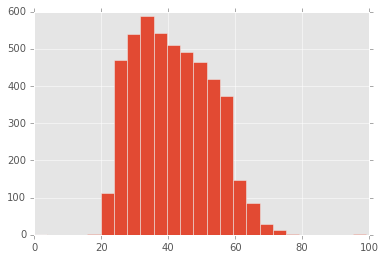

In [107]:
flight_crew['crew_age'].hist(bins=25)

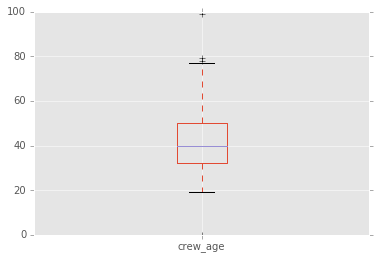

In [108]:
flight_crew['crew_age'].plot.box()

According to GAMMA databook:
    http://www.gama.aero/files/GAMA_2015_Databook_LoRes%20updated%203-29-2016.pdf
    http://www.gama.aero/media-center/industry-facts-and-statistics/statistical-databook-and-industry-outlook#year2015

#### And finally... is commercial air transport safer now than 30 years ago?

#### Other Questions... 

### Conclusions 

# Thanks for yor attention! 

![PyData_logo](./static/pydata-logo-madrid-2016.png)

## Any Questions?


---


In [32]:
# Notebook style
from IPython.core.display import HTML
css_file = './static/style.css'
HTML(open(css_file, "r").read())